Project 6: Stroop Effect
============
_______

# Background Information
> In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">RED</span>, <span style="color:blue">BLUE</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">PURPLE</span>, <span style="color:purple">ORANGE</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


# Loading Data

> Data set is retrieved from [this source](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view).

In [1]:
library(ggplot2)
library(repr) # resize plot
library(gridExtra) # grid for plots
library(GGally) # ggpairs - multivariate summary

In [2]:
# Load the Data
se <- read.csv("stroopdata.csv")
head(se)

Congruent,Incongruent
12.079,19.278
16.791,18.741
9.564,21.214
8.630,15.687
14.669,22.803
12.238,20.878


In [3]:
dim(se)

[1] 24  2

In [4]:
str(se)

'data.frame':	24 obs. of  2 variables:
 $ Congruent  : num  12.08 16.79 9.56 8.63 14.67 ...
 $ Incongruent: num  19.3 18.7 21.2 15.7 22.8 ...


# Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

## 1. What is our independent variable? What is our dependent variable?

> **Independent variable** or the variable changed here for the experiment is the <u>text of colors/ink</u>.  

> **Dependent variable** or the variable which is observed is the <u>duration in which a person names all ink colors.</u>.  

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

> <p class="c2"><span>Now it’s your chance to try out the Stroop task for yourself. Go to </span><span class="c7"><a class="c8" href="https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&amp;sa=D&amp;ust=1505688389258000&amp;usg=AFQjCNGyoQJYdsm_R0nn3SJE1TUb-wWtbw">this link</a></span><span>, which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download </span><span class="c7"><a class="c8" href="https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&amp;sa=D&amp;ust=1505688389259000&amp;usg=AFQjCNHUSBUafLP3-4LLBae2NIy8gRkS1Q">this dataset</a></span><span class="c6">&nbsp;which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.</span></p>

**My results:**

**Congruent** --> 13.10s

**Incongruent** --> 22.57s
______

**Null Hypothesis:**
* **H<sub>0</sub>**: μ = μ<sub>0</sub> --> Changing text of color to another color will **have no effect** on mean duration of naming an ink color.

**Alternate Hypothesis:**
* **H<sub>A</sub>**: μ > μ<sub>0</sub> --> Changing text of color to another color will **increase** mean duration of naming an ink color.
___________

> **μ**: Population mean after experimented change

> **μ<sub>0</sub>**: Population mean prior to change

> We don't know population parameters, we only have two dependent samples from the same subject group. The experiment process fits into pre-test / post-test design. Therefore, we are going to apply **dependent t-test for paired samples**:

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [5]:
summary(se$Congruent)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.63   11.90   14.36   14.05   16.20   22.33 

In [6]:
summary(se$Incongruent)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.69   18.72   21.02   22.02   24.05   35.26 

In [7]:
sd(se$Congruent)

[1] 3.559358

In [8]:
sd(se$Incongruent)

[1] 4.797057

**Standart Deviation:**

StDev(Congruent, Incongruent) --> (3.56, 4.80)
______

## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

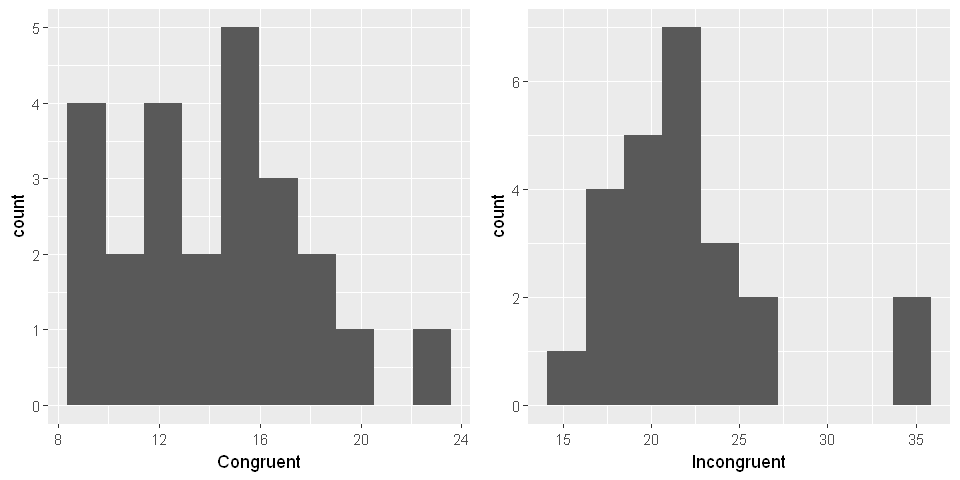

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
g1 <- ggplot(aes(x=Congruent), data=se) + geom_histogram(bins=10)
g2 <- ggplot(aes(x=Incongruent), data=se) + geom_histogram(bins=10)
grid.arrange(g1,g2,ncol=2)

> Both graphs seem to have a normal distribution with a few outliers at higher durations. For **Congruent** distribution, mean normal distribution is around 14, while this value is around 22 for **Incongruent** distribution.


## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [10]:
se$diff <- (se$Congruent - se$Incongruent)

I would like to set my critical value alpha at 0.05

Degrees of freedom = (n - 1) = (24 - 1)

Degrees of freedom = 23

> Since our alternate hypothesis indicates that the duration will increase, we can apply one tailed test at positive direction.

t<sub>critical</sub> = 1.714

In [11]:
sd(se$diff)

[1] 4.864827

S<sub>D</sub> = 4.86

In [12]:
t_statistic = (mean(se$Incongruent) - mean(se$Congruent)) /
                (sd(se$diff) / sqrt(length(se$diff)))
t_statistic

[1] 8.020707

t<sub>statistic</sub> = 8.02

t<sub>statistic</sub> = 8.02 is much larger than t<sub>critical</sub> = 1.714. Therefore, we can conclude that our <u>**Null Hypothesis is wrong**</u> ,and our <u>**Alternate Hypothesis is correct**</u>.

This means that changing ink text to a color name other than the ink color definitely increases the mean duration. 

## 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

> I think the reason duration in which naming ink color increases is that our minds tend to read text if the text indicates a related information to the information we are looking for. In this case, we are determining color of the ink, whereas the the very text which is inked denotes a color name.
____

> A similar test is asking for number of characters in a word. In an alternate test, the words can be cahnged to the numbers.

> **For example:**

> <u>Initial test</u> --> door, school, task, medicine

> <u>Alternate test</u> --> five, seven, one, eleven